In [1]:
#!pip install pymysql
import pymysql as sql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder , MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
import pickle
                                                        

In [2]:
connection=sql.connect(
     user="root",
    password='99ashraf36',
    host="localhost",
    database="credit_card",
)

In [3]:
cursor=connection.cursor()

In [4]:
cursor.execute("select * from credit_card")

10108

In [5]:
result=cursor.fetchall()

In [6]:
data=result

In [7]:
col=[i[0] for i in cursor.description]

In [8]:
df=pd.DataFrame(data=result , columns = col)

In [9]:
df

ï»¿Client_Num Card_Category  Annual_Fees  Activation_30_Days  \
0          708082083          Blue          200                   0   
1          708083283          Blue          445                   1   
2          708084558          Blue          140                   0   
3          708085458          Blue          250                   1   
4          708086958          Blue          320                   1   
...              ...           ...          ...                 ...   
10103      827695683          Blue          340                   1   
10104      827703258          Blue          395                   1   
10105      827712108          Blue          125                   1   
10106      827888433          Blue          410                   0   
10107      827890758          Blue          100                   0   

       Customer_Acq_Cost Week_Start_Date Week_Num Qtr  current_year  \
0                     87      01-01-2023   Week-1  Q1          2023   
1                    108      01-01-2023   Week-1  Q1          2023   
2                    106      01-01-2023   Week-1  Q1          2023   
3                    150      01-01-2023   Week-1  Q1          2023   
4                    106      01-01-2023   Week-1  Q1          2023   
...                  ...             ...      ...  ..           ...   
10103                106      24-12-2023  Week-52  Q4          2023   
10104                104      24-12-2023  Week-52  Q4          2023   
10105                107      24-12-2023  Week-52  Q4          2023   
10106                 96      24-12-2023  Week-52  Q4          2023   
10107                 43      24-12-2023  Week-52  Q4          2023   

       Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt  Total_Trans_Vol  \
0            3544.0                 1661            15149              111   
1            3421.0                 2517              992               21   
2            8258.0                 1771             1447               23   
3            1438.3                    0             3940               82   
4            3128.0                  749             4369               59   
...             ...                  ...              ...              ...   
10103       34516.0                 1329             3906               77   
10104       13426.0                    0             4674               66   
10105        2346.0                 1373             4432               72   
10106        6648.0                 2242             2089               60   
10107        2062.0                 1302             3785               63   

       Avg_Utilization_Ratio Use Chip       Exp Type  Interest_Earned  \
0                      0.469    Chip          Travel          4393.21   
1                      0.736   Swipe   Entertainment            69.44   
2                      0.214    Chip           Bills           202.58   
3                      0.000  Online         Grocery           236.40   
4                      0.239   Swipe            Fuel          1004.87   
...                      ...      ...            ...              ...   
10103                  0.039   Swipe            Fuel           546.84   
10104                  0.000   Swipe         Grocery           607.62   
10105                  0.585   Swipe           Bills           797.76   
10106                  0.337   Swipe           Bills           146.23   
10107                  0.631    Chip           Bills          1059.80   

       Delinquent_Acc  
0                   0  
1                   0  
2                   0  
3                   0  
4                   1  
...               ...  
10103               0  
10104               0  
10105               0  
10106               0  
10107               0  

[10108 rows x 18 columns]

In [10]:
df.columns

Index(['ï»¿Client_Num', 'Card_Category', 'Annual_Fees', 'Activation_30_Days',
       'Customer_Acq_Cost', 'Week_Start_Date', 'Week_Num', 'Qtr',
       'current_year', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Total_Trans_Vol', 'Avg_Utilization_Ratio',
       'Use Chip', 'Exp Type', 'Interest_Earned', 'Delinquent_Acc'],
      dtype='object')

In [11]:
df.shape

(10108, 18)

In [12]:
df.isnull().sum()

ï»¿Client_Num            0
Card_Category            0
Annual_Fees              0
Activation_30_Days       0
Customer_Acq_Cost        0
Week_Start_Date          0
Week_Num                 0
Qtr                      0
current_year             0
Credit_Limit             0
Total_Revolving_Bal      0
Total_Trans_Amt          0
Total_Trans_Vol          0
Avg_Utilization_Ratio    0
Use Chip                 0
Exp Type                 0
Interest_Earned          0
Delinquent_Acc           0
dtype: int64

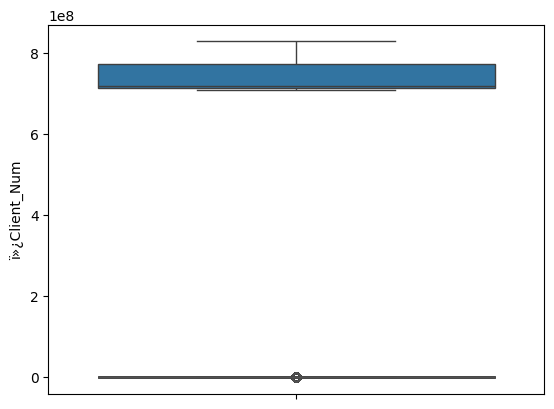

In [13]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(df[i])
        plt.show

<Axes: xlabel='Delinquent_Acc', ylabel='Total_Trans_Amt'>

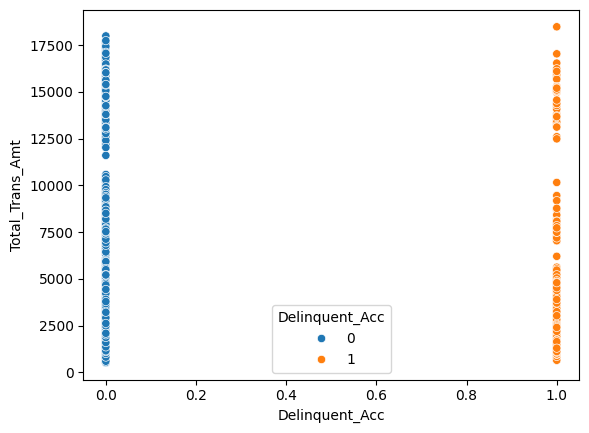

In [14]:
sns.scatterplot(data = df , x ="Delinquent_Acc", y ="Total_Trans_Amt" , hue = "Delinquent_Acc" )

In [15]:
df.columns

Index(['ï»¿Client_Num', 'Card_Category', 'Annual_Fees', 'Activation_30_Days',
       'Customer_Acq_Cost', 'Week_Start_Date', 'Week_Num', 'Qtr',
       'current_year', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Total_Trans_Vol', 'Avg_Utilization_Ratio',
       'Use Chip', 'Exp Type', 'Interest_Earned', 'Delinquent_Acc'],
      dtype='object')

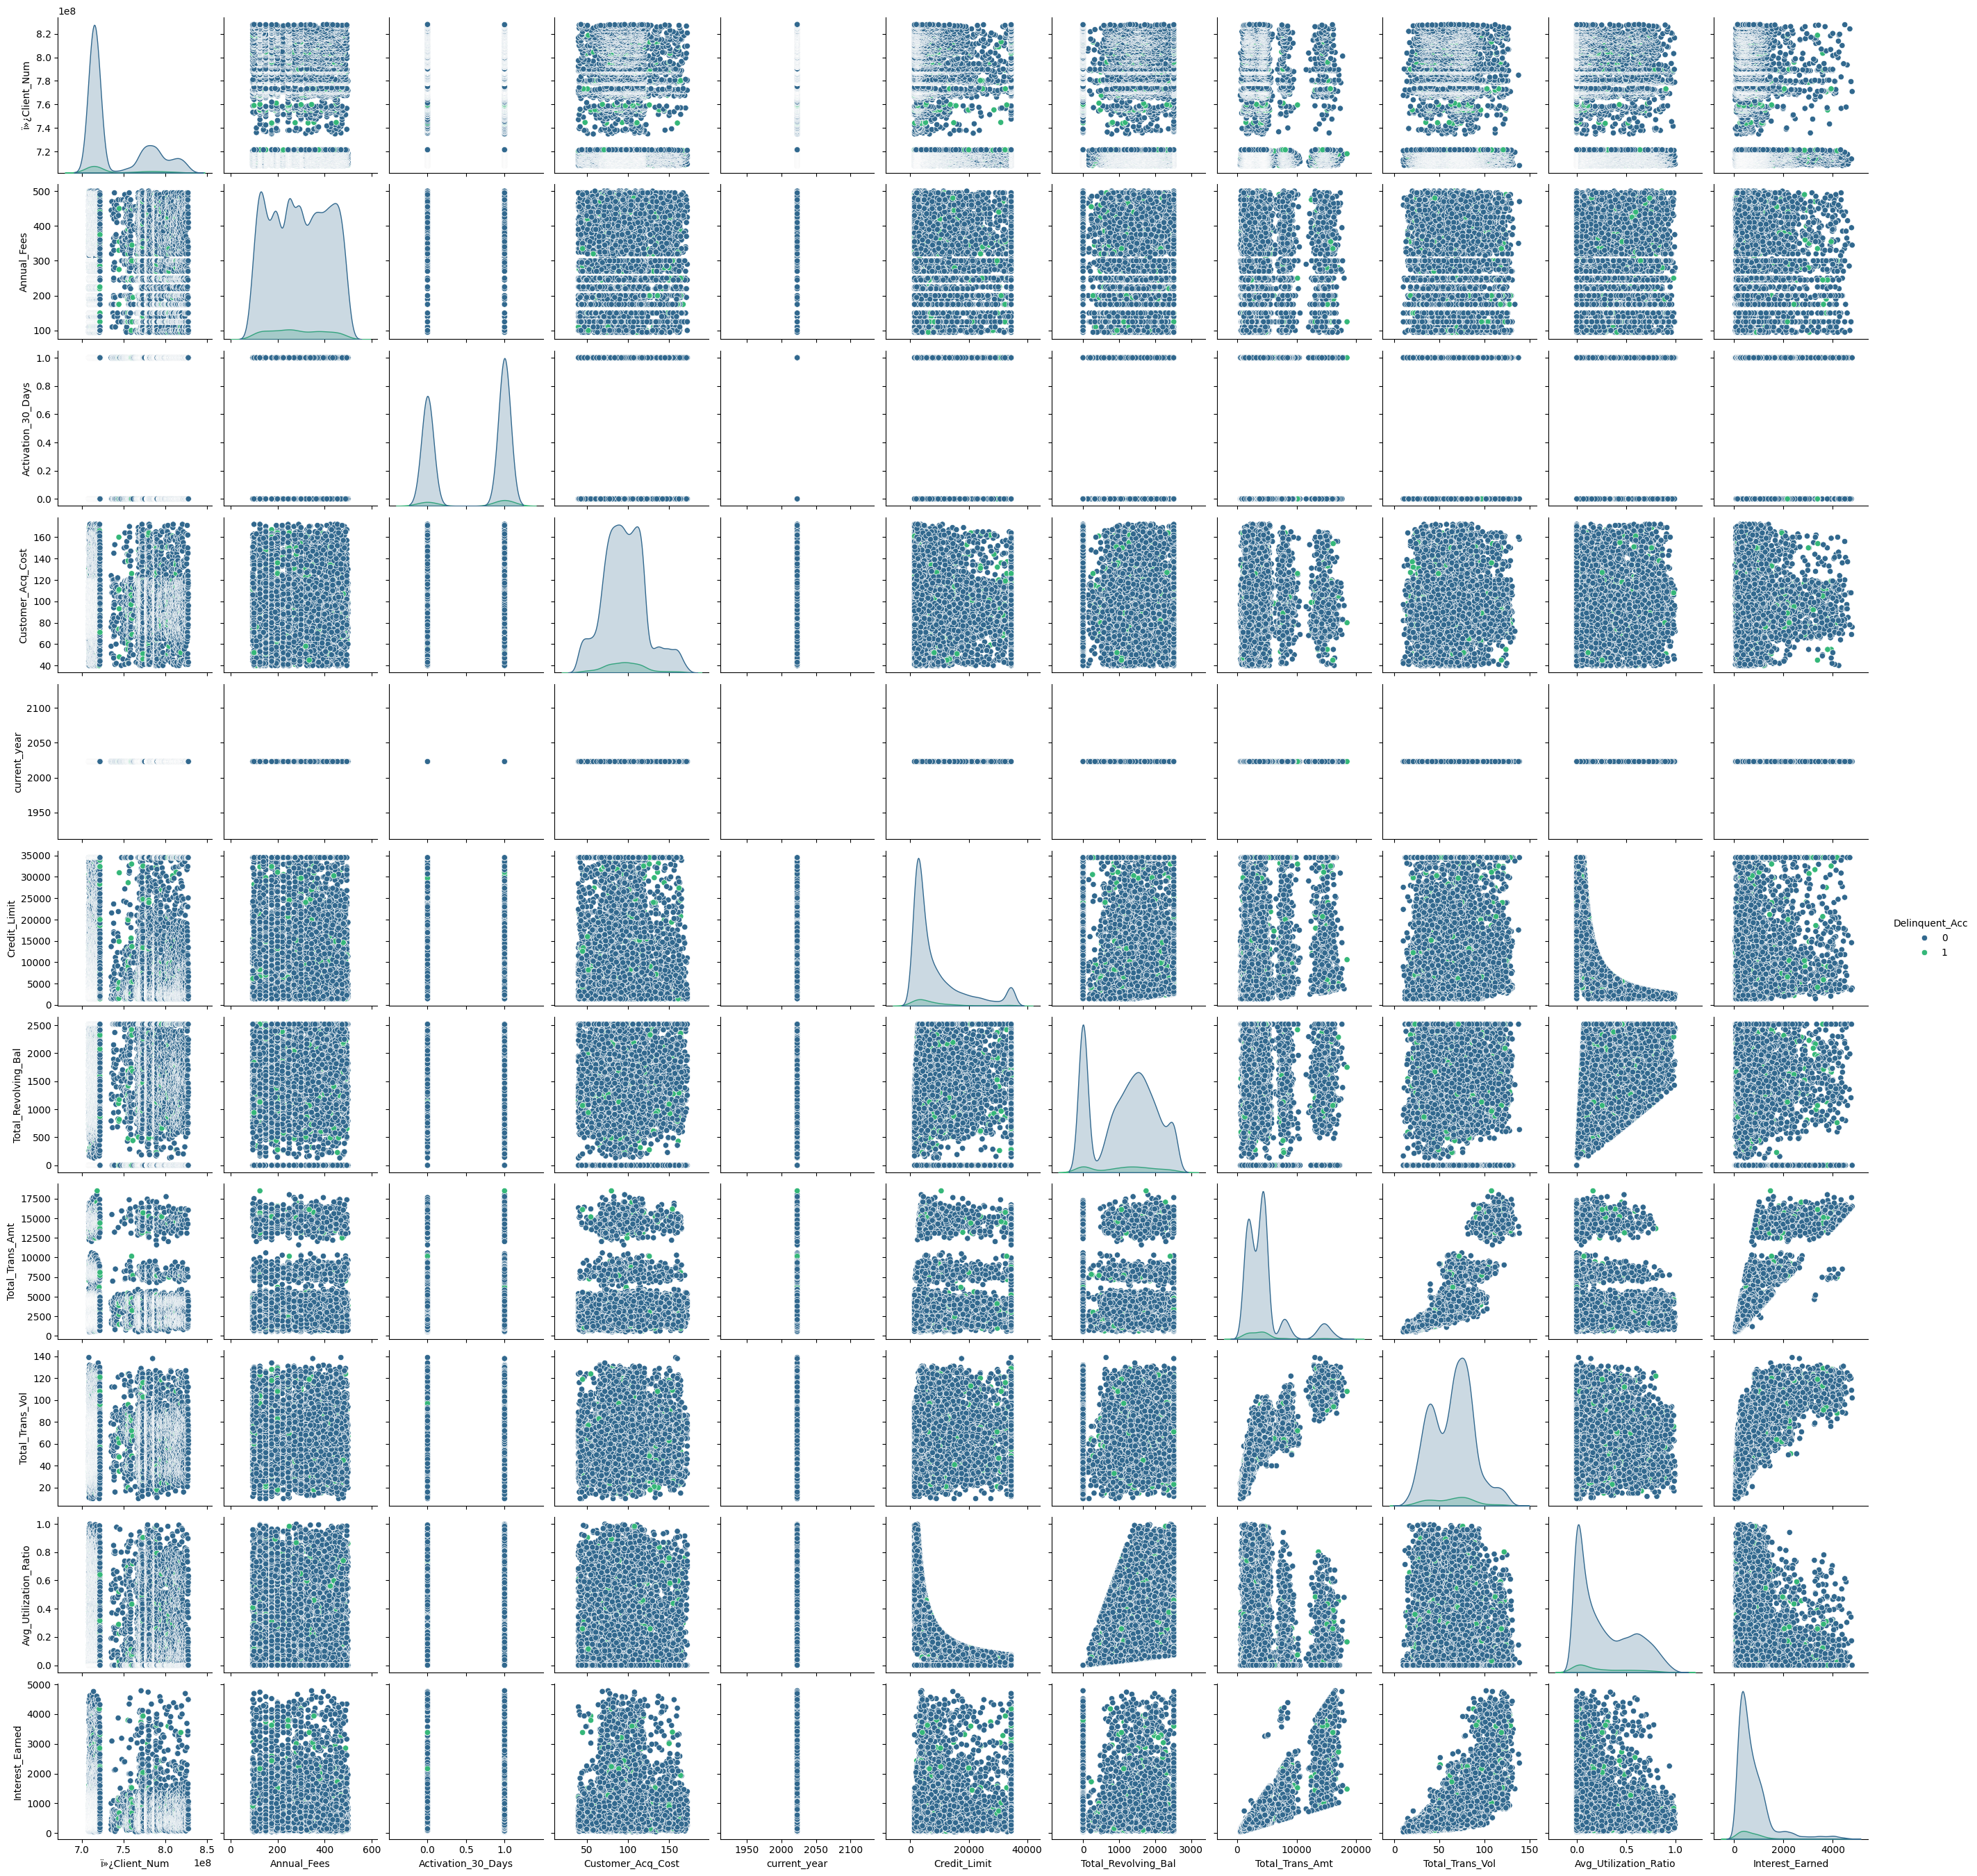

In [16]:
sns.pairplot(df, hue="Delinquent_Acc" , palette = "viridis")
plt.show()

In [17]:
df

ï»¿Client_Num Card_Category  Annual_Fees  Activation_30_Days  \
0          708082083          Blue          200                   0   
1          708083283          Blue          445                   1   
2          708084558          Blue          140                   0   
3          708085458          Blue          250                   1   
4          708086958          Blue          320                   1   
...              ...           ...          ...                 ...   
10103      827695683          Blue          340                   1   
10104      827703258          Blue          395                   1   
10105      827712108          Blue          125                   1   
10106      827888433          Blue          410                   0   
10107      827890758          Blue          100                   0   

       Customer_Acq_Cost Week_Start_Date Week_Num Qtr  current_year  \
0                     87      01-01-2023   Week-1  Q1          2023   
1                    108      01-01-2023   Week-1  Q1          2023   
2                    106      01-01-2023   Week-1  Q1          2023   
3                    150      01-01-2023   Week-1  Q1          2023   
4                    106      01-01-2023   Week-1  Q1          2023   
...                  ...             ...      ...  ..           ...   
10103                106      24-12-2023  Week-52  Q4          2023   
10104                104      24-12-2023  Week-52  Q4          2023   
10105                107      24-12-2023  Week-52  Q4          2023   
10106                 96      24-12-2023  Week-52  Q4          2023   
10107                 43      24-12-2023  Week-52  Q4          2023   

       Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt  Total_Trans_Vol  \
0            3544.0                 1661            15149              111   
1            3421.0                 2517              992               21   
2            8258.0                 1771             1447               23   
3            1438.3                    0             3940               82   
4            3128.0                  749             4369               59   
...             ...                  ...              ...              ...   
10103       34516.0                 1329             3906               77   
10104       13426.0                    0             4674               66   
10105        2346.0                 1373             4432               72   
10106        6648.0                 2242             2089               60   
10107        2062.0                 1302             3785               63   

       Avg_Utilization_Ratio Use Chip       Exp Type  Interest_Earned  \
0                      0.469    Chip          Travel          4393.21   
1                      0.736   Swipe   Entertainment            69.44   
2                      0.214    Chip           Bills           202.58   
3                      0.000  Online         Grocery           236.40   
4                      0.239   Swipe            Fuel          1004.87   
...                      ...      ...            ...              ...   
10103                  0.039   Swipe            Fuel           546.84   
10104                  0.000   Swipe         Grocery           607.62   
10105                  0.585   Swipe           Bills           797.76   
10106                  0.337   Swipe           Bills           146.23   
10107                  0.631    Chip           Bills          1059.80   

       Delinquent_Acc  
0                   0  
1                   0  
2                   0  
3                   0  
4                   1  
...               ...  
10103               0  
10104               0  
10105               0  
10106               0  
10107               0  

[10108 rows x 18 columns]

In [18]:
for i in df.columns:
    if df[i].dtype == 'object' and i != "Delinquent_Acc":
        le=LabelEncoder()
        df[i]=le.fit_transform(df[i])

        

In [19]:
df

ï»¿Client_Num  Card_Category  Annual_Fees  Activation_30_Days  \
0          708082083              0          200                   0   
1          708083283              0          445                   1   
2          708084558              0          140                   0   
3          708085458              0          250                   1   
4          708086958              0          320                   1   
...              ...            ...          ...                 ...   
10103      827695683              0          340                   1   
10104      827703258              0          395                   1   
10105      827712108              0          125                   1   
10106      827888433              0          410                   0   
10107      827890758              0          100                   0   

       Customer_Acq_Cost  Week_Start_Date  Week_Num  Qtr  current_year  \
0                     87                0         0    0          2023   
1                    108                0         0    0          2023   
2                    106                0         0    0          2023   
3                    150                0         0    0          2023   
4                    106                0         0    0          2023   
...                  ...              ...       ...  ...           ...   
10103                106               41        47    3          2023   
10104                104               41        47    3          2023   
10105                107               41        47    3          2023   
10106                 96               41        47    3          2023   
10107                 43               41        47    3          2023   

       Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt  Total_Trans_Vol  \
0            3544.0                 1661            15149              111   
1            3421.0                 2517              992               21   
2            8258.0                 1771             1447               23   
3            1438.3                    0             3940               82   
4            3128.0                  749             4369               59   
...             ...                  ...              ...              ...   
10103       34516.0                 1329             3906               77   
10104       13426.0                    0             4674               66   
10105        2346.0                 1373             4432               72   
10106        6648.0                 2242             2089               60   
10107        2062.0                 1302             3785               63   

       Avg_Utilization_Ratio  Use Chip  Exp Type  Interest_Earned  \
0                      0.469         0         5          4393.21   
1                      0.736         2         1            69.44   
2                      0.214         0         0           202.58   
3                      0.000         1         4           236.40   
4                      0.239         2         3          1004.87   
...                      ...       ...       ...              ...   
10103                  0.039         2         3           546.84   
10104                  0.000         2         4           607.62   
10105                  0.585         2         0           797.76   
10106                  0.337         2         0           146.23   
10107                  0.631         0         0          1059.80   

       Delinquent_Acc  
0                   0  
1                   0  
2                   0  
3                   0  
4                   1  
...               ...  
10103               0  
10104               0  
10105               0  
10106               0  
10107               0  

[10108 rows x 18 columns]

In [20]:
x=df.drop("Delinquent_Acc" , axis = 1 )
y=df["Delinquent_Acc"]

<Axes: >

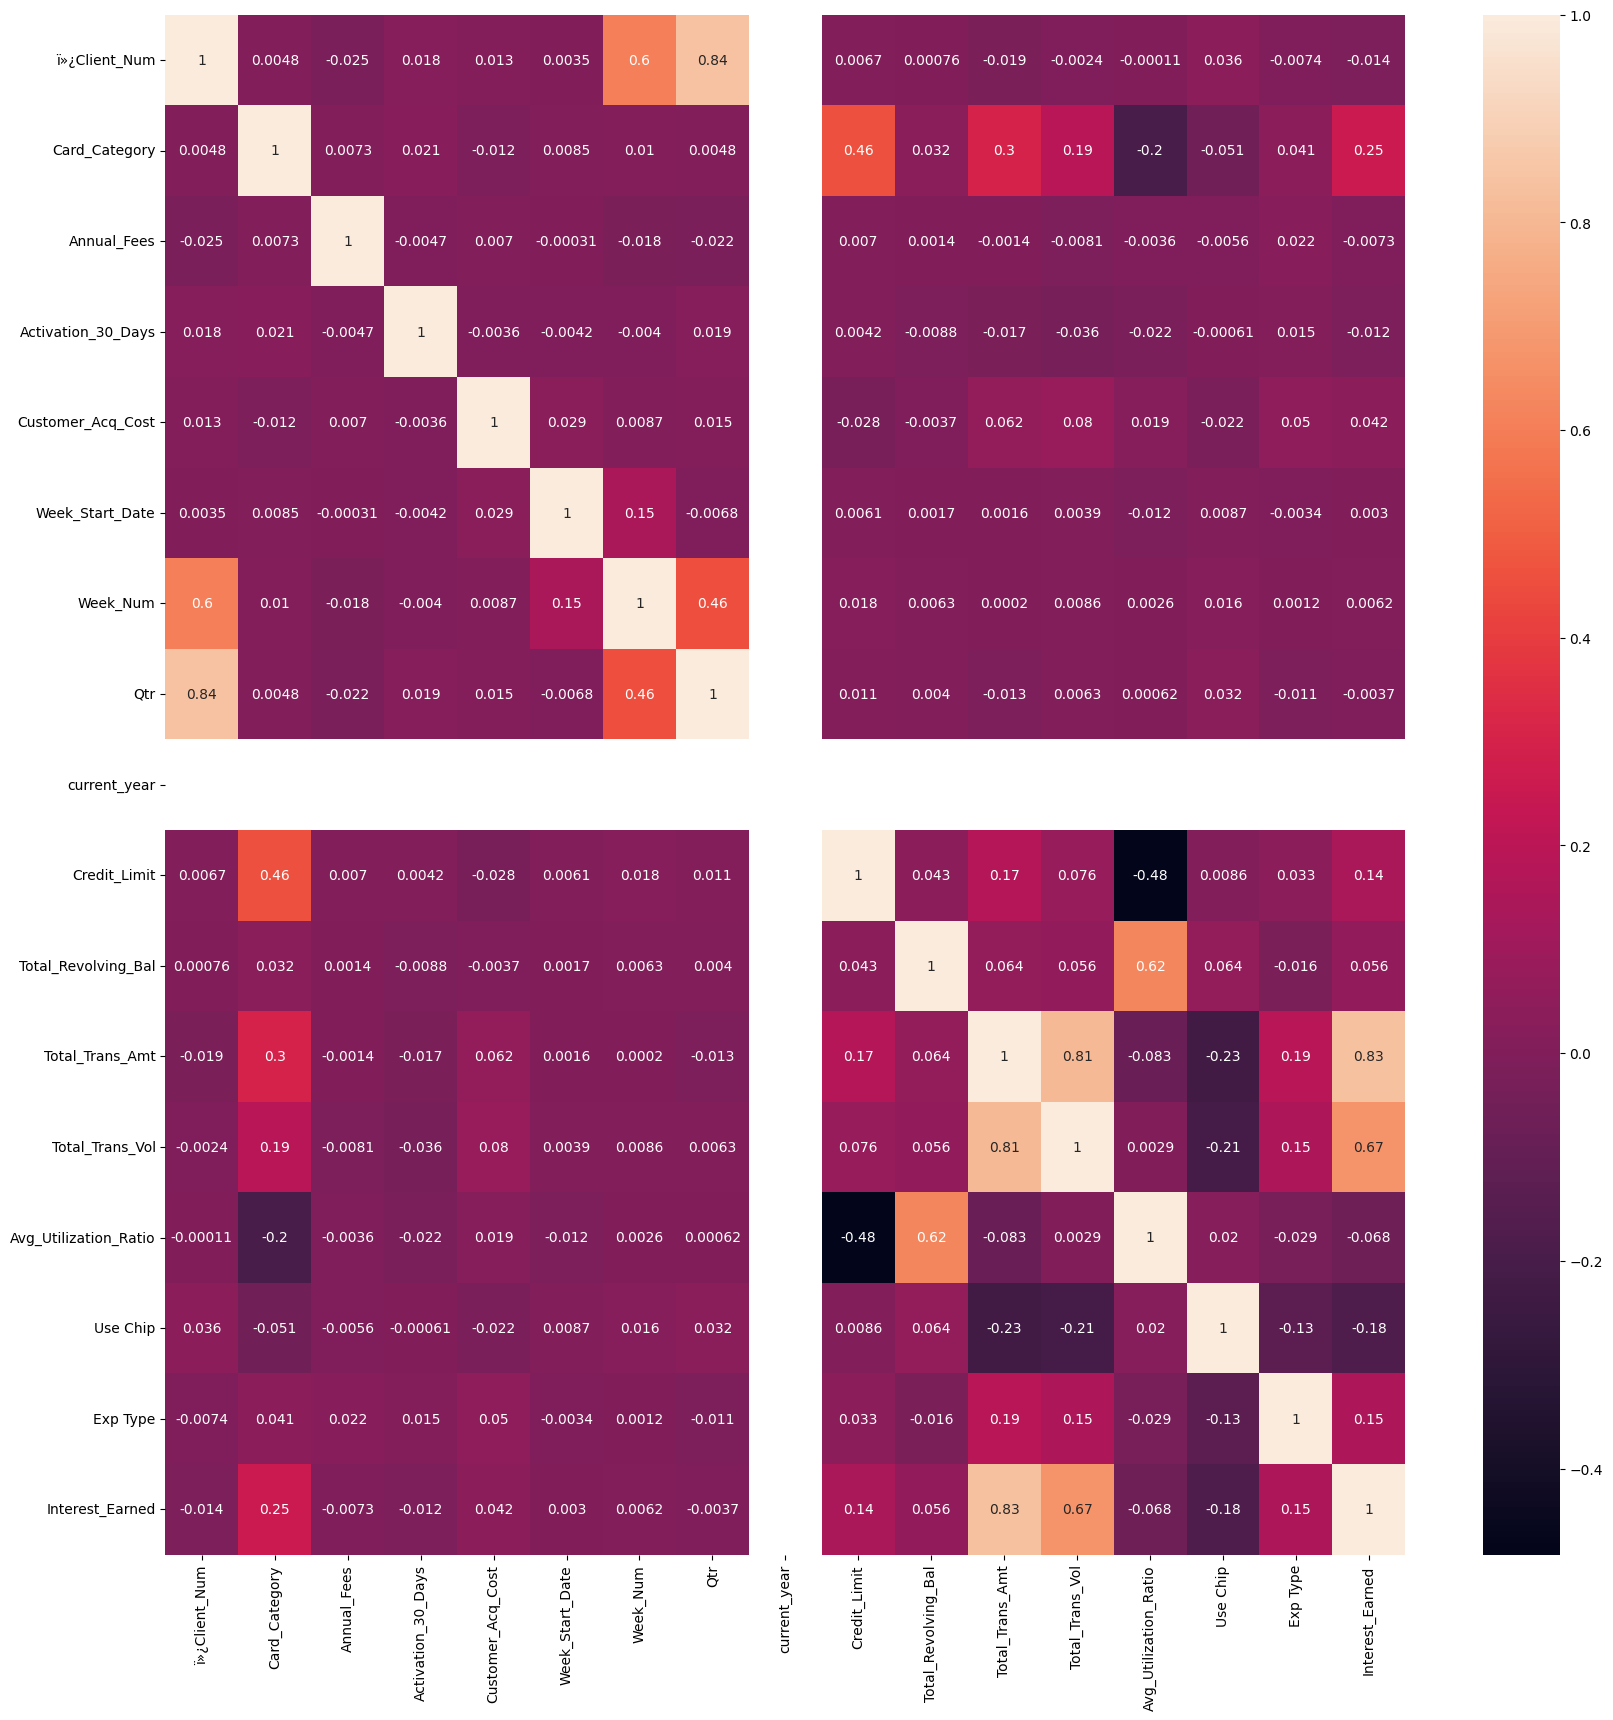

In [21]:
plt.figure(figsize= (20,20))
sns.heatmap(x.corr() , annot = True )

In [23]:
xstd=x.copy()
xnorm=x.copy()

In [24]:
for i in x.columns:
    xstd[i] = StandardScaler().fit_transform(x[[i]])
    xnorm[i] = MinMaxScaler().fit_transform(x[[i]])

In [25]:
xtrain , xtest , ytrain , ytest = train_test_split(xnorm , y , test_size = 0.2)

In [26]:
LR=LogisticRegression()

In [27]:
LR.fit(xtrain , ytrain)

LogisticRegression()

In [28]:
LR.score(xtest,ytest)

0.9431256181998022

In [29]:
pred=LR.predict(xtest )

In [30]:
pd.DataFrame({"Act":ytest , "Predict":pred})

Act  Predict
6490    0        0
734     0        0
8783    0        0
1008    0        0
4938    0        0
...   ...      ...
9964    0        0
4778    0        0
2379    0        0
8003    0        0
3608    0        0

[2022 rows x 2 columns]

# Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB , BernoulliNB ,CategoricalNB ,MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
GNB=GaussianNB()

In [33]:
GNB.fit(xtrain , ytrain)

GaussianNB()

In [34]:
GNB.score(xtest , ytest)

0.9431256181998022

In [35]:
BNB= BernoulliNB()

In [36]:
BNB.fit(xtrain , ytrain)

BernoulliNB()

In [37]:
BNB.score(xtest , ytest)

0.9327398615232443

In [38]:
pred=BNB.predict(xtest)

In [39]:
pd.DataFrame({"Act":ytest , "predict":pred})

Act  predict
6490    0        0
734     0        0
8783    0        0
1008    0        0
4938    0        0
...   ...      ...
9964    0        0
4778    0        0
2379    0        0
8003    0        0
3608    0        0

[2022 rows x 2 columns]

In [40]:
df

ï»¿Client_Num  Card_Category  Annual_Fees  Activation_30_Days  \
0          708082083              0          200                   0   
1          708083283              0          445                   1   
2          708084558              0          140                   0   
3          708085458              0          250                   1   
4          708086958              0          320                   1   
...              ...            ...          ...                 ...   
10103      827695683              0          340                   1   
10104      827703258              0          395                   1   
10105      827712108              0          125                   1   
10106      827888433              0          410                   0   
10107      827890758              0          100                   0   

       Customer_Acq_Cost  Week_Start_Date  Week_Num  Qtr  current_year  \
0                     87                0         0    0          2023   
1                    108                0         0    0          2023   
2                    106                0         0    0          2023   
3                    150                0         0    0          2023   
4                    106                0         0    0          2023   
...                  ...              ...       ...  ...           ...   
10103                106               41        47    3          2023   
10104                104               41        47    3          2023   
10105                107               41        47    3          2023   
10106                 96               41        47    3          2023   
10107                 43               41        47    3          2023   

       Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt  Total_Trans_Vol  \
0            3544.0                 1661            15149              111   
1            3421.0                 2517              992               21   
2            8258.0                 1771             1447               23   
3            1438.3                    0             3940               82   
4            3128.0                  749             4369               59   
...             ...                  ...              ...              ...   
10103       34516.0                 1329             3906               77   
10104       13426.0                    0             4674               66   
10105        2346.0                 1373             4432               72   
10106        6648.0                 2242             2089               60   
10107        2062.0                 1302             3785               63   

       Avg_Utilization_Ratio  Use Chip  Exp Type  Interest_Earned  \
0                      0.469         0         5          4393.21   
1                      0.736         2         1            69.44   
2                      0.214         0         0           202.58   
3                      0.000         1         4           236.40   
4                      0.239         2         3          1004.87   
...                      ...       ...       ...              ...   
10103                  0.039         2         3           546.84   
10104                  0.000         2         4           607.62   
10105                  0.585         2         0           797.76   
10106                  0.337         2         0           146.23   
10107                  0.631         0         0          1059.80   

       Delinquent_Acc  
0                   0  
1                   0  
2                   0  
3                   0  
4                   1  
...               ...  
10103               0  
10104               0  
10105               0  
10106               0  
10107               0  

[10108 rows x 18 columns]

In [42]:
SP=pd.read_excel("Superstore.xlsx")

In [46]:
with open('Superstore.pkl', 'wb') as f:
    pickle.dump(SP, f)

In [47]:
with open('Superstore.pkl', 'rb') as f:
    SP_loaded = pickle.load(f)

In [48]:
print(SP_loaded.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ... Region  \
0      Claire Gute   Consumer  United States        Henderson  ...  South   
1      Claire Gute   Consumer  United States        Henderson  ...  South   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   West   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   

        Product ID         Category Sub-Category  \
0  FUR-BO-